# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:\n", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs:
 a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a   -0.473629
b    0.291919
c    0.406706
d    1.103820
e    1.471605
dtype: float64
a         NaN
b    0.583837
c    0.813412
d    2.207640
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2020,11,9,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 9 2020'
# or alternatively
date = '9/11/2020 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2020-11-10
2020-11-09 14:45:10.000015
9/11/2020 14:45:00
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-12 14:45:00',
               '2020-09-13 14:45:00', '2020-09-14 14:45:00',
               '2020-09-15 14:45:00', '2020-09-16 14:45:00',
               '2020-09-17 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-11 14:45:01',
               '2020-09-11 14:45:02', '2020-09-11 14:45:03',
               '2020-09-11 14:45:04', '2020-09-11 14:45:05',
               '2020-09-11 14:45:06', '2020-09-11 14:45:07',
               '2020-09-11 14:45:08', '2020-09-11 14:45:09',
               ...
               '2020-09-11 15:44:50', '2020-09-11 15:44:51',
               '2020-09-11 15:44:52', '2020-09-11 15:44:53',
               '2020-09-11 15:44:54', '2020-09-11 15:44:55',
               '2020-09-11 15:44:56', '2020-09-11 15:44:57',
               '2020-09-11 15:44:58', '2020-09-11 15:44:59'],
              dtype='datetime64[ns]', lengt

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [7]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2010-11-12 00:00:00
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2020-09-11':'2020-11-11'], '\n') # Note - includes end time


2020-09-11 14:45:00    10.207536
2020-09-12 14:45:00     8.604812
2020-09-13 14:45:00    10.728095
2020-09-14 14:45:00     9.678478
Freq: D, dtype: float64 

2020-09-11 14:45:00    10.207536
2020-09-12 14:45:00     8.604812
2020-09-13 14:45:00    10.728095
2020-09-14 14:45:00     9.678478
2020-09-15 14:45:00    10.529258
2020-09-16 14:45:00     8.647478
2020-09-17 14:45:00    10.573507
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries=10
dates=pd.date_range('11/9/2020 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2020-11-09 14:45:00,-0.394041,0.562645,0.184256,0.562511
2020-11-09 15:45:00,0.741943,0.273883,-0.007798,0.282273
2020-11-09 16:45:00,0.366514,-1.700445,1.435616,-0.589864
2020-11-09 17:45:00,0.753354,0.784860,0.844903,-0.549068
2020-11-09 18:45:00,0.029560,0.070014,-1.022010,1.292274
2020-11-09 19:45:00,-0.817292,0.229358,-0.298763,0.451463
2020-11-09 20:45:00,-1.199407,0.513297,-0.403679,-1.133708
2020-11-09 21:45:00,1.825249,0.806271,-1.346731,-1.456559
2020-11-09 22:45:00,-0.206894,0.995855,0.398911,-0.312772
2020-11-09 23:45:00,-0.364159,-1.807125,-0.097193,-2.256184


or by means of a dictionary:


In [11]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [12]:
df.head()

,A,B,C,D
2020-11-09 14:45:00,-0.394041,0.562645,0.184256,0.562511
2020-11-09 15:45:00,0.741943,0.273883,-0.007798,0.282273
2020-11-09 16:45:00,0.366514,-1.700445,1.435616,-0.589864
2020-11-09 17:45:00,0.753354,0.784860,0.844903,-0.549068
2020-11-09 18:45:00,0.029560,0.070014,-1.022010,1.292274


In [13]:
df.tail(4)

,A,B,C,D
2020-11-09 20:45:00,-1.199407,0.513297,-0.403679,-1.133708
2020-11-09 21:45:00,1.825249,0.806271,-1.346731,-1.456559
2020-11-09 22:45:00,-0.206894,0.995855,0.398911,-0.312772
2020-11-09 23:45:00,-0.364159,-1.807125,-0.097193,-2.256184


In [14]:
df.index

DatetimeIndex(['2020-11-09 14:45:00', '2020-11-09 15:45:00',
               '2020-11-09 16:45:00', '2020-11-09 17:45:00',
               '2020-11-09 18:45:00', '2020-11-09 19:45:00',
               '2020-11-09 20:45:00', '2020-11-09 21:45:00',
               '2020-11-09 22:45:00', '2020-11-09 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[-0.39404146,  0.56264548,  0.18425645,  0.56251072],
       [ 0.7419427 ,  0.27388337, -0.00779789,  0.28227298],
       [ 0.36651409, -1.70044508,  1.43561599, -0.5898637 ],
       [ 0.75335414,  0.78486046,  0.84490346, -0.54906753],
       [ 0.02955983,  0.07001442, -1.02200979,  1.29227383],
       [-0.81729248,  0.22935753, -0.29876271,  0.4514633 ],
       [-1.19940737,  0.51329696, -0.40367875, -1.13370773],
       [ 1.82524874,  0.80627131, -1.346731  , -1.45655921],
       [-0.2068941 ,  0.99585541,  0.39891143, -0.31277155],
       [-0.36415861, -1.80712545, -0.09719278, -2.25618434]])

In [17]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.073483,0.072861,-0.031249,-0.370963
std,0.879899,1.004130,0.821792,1.061352
min,-1.199407,-1.807125,-1.346731,-2.256184
25%,-0.386571,0.109850,-0.377450,-0.997747
50%,-0.088667,0.393590,-0.052495,-0.430920
75%,0.648086,0.729307,0.345248,0.409166
max,1.825249,0.995855,1.435616,1.292274


In [18]:
df.T

,2020-11-09 14:45:00,2020-11-09 15:45:00,2020-11-09 16:45:00,2020-11-09 17:45:00,2020-11-09 18:45:00,2020-11-09 19:45:00,2020-11-09 20:45:00,2020-11-09 21:45:00,2020-11-09 22:45:00,2020-11-09 23:45:00
A,-0.394041,0.741943,0.366514,0.753354,0.029560,-0.817292,-1.199407,1.825249,-0.206894,-0.364159
B,0.562645,0.273883,-1.700445,0.784860,0.070014,0.229358,0.513297,0.806271,0.995855,-1.807125
C,0.184256,-0.007798,1.435616,0.844903,-1.022010,-0.298763,-0.403679,-1.346731,0.398911,-0.097193
D,0.562511,0.282273,-0.589864,-0.549068,1.292274,0.451463,-1.133708,-1.456559,-0.312772,-2.256184


In [19]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2020-11-09 14:45:00,0.562511,0.184256,0.562645,-0.394041
2020-11-09 15:45:00,0.282273,-0.007798,0.273883,0.741943
2020-11-09 16:45:00,-0.589864,1.435616,-1.700445,0.366514
2020-11-09 17:45:00,-0.549068,0.844903,0.784860,0.753354
2020-11-09 18:45:00,1.292274,-1.022010,0.070014,0.029560
2020-11-09 19:45:00,0.451463,-0.298763,0.229358,-0.817292
2020-11-09 20:45:00,-1.133708,-0.403679,0.513297,-1.199407
2020-11-09 21:45:00,-1.456559,-1.346731,0.806271,1.825249
2020-11-09 22:45:00,-0.312772,0.398911,0.995855,-0.206894
2020-11-09 23:45:00,-2.256184,-0.097193,-1.807125,-0.364159


In [20]:
df.sort_values(by="C")

,A,B,C,D
2020-11-09 21:45:00,1.825249,0.806271,-1.346731,-1.456559
2020-11-09 18:45:00,0.029560,0.070014,-1.022010,1.292274
2020-11-09 20:45:00,-1.199407,0.513297,-0.403679,-1.133708
2020-11-09 19:45:00,-0.817292,0.229358,-0.298763,0.451463
2020-11-09 23:45:00,-0.364159,-1.807125,-0.097193,-2.256184
2020-11-09 15:45:00,0.741943,0.273883,-0.007798,0.282273
2020-11-09 14:45:00,-0.394041,0.562645,0.184256,0.562511
2020-11-09 22:45:00,-0.206894,0.995855,0.398911,-0.312772
2020-11-09 17:45:00,0.753354,0.784860,0.844903,-0.549068
2020-11-09 16:45:00,0.366514,-1.700445,1.435616,-0.589864


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [21]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2020-11-09 14:45:00   -0.394041
2020-11-09 15:45:00    0.741943
2020-11-09 16:45:00    0.366514
2020-11-09 17:45:00    0.753354
2020-11-09 18:45:00    0.029560
2020-11-09 19:45:00   -0.817292
2020-11-09 20:45:00   -1.199407
2020-11-09 21:45:00    1.825249
2020-11-09 22:45:00   -0.206894
2020-11-09 23:45:00   -0.364159
Freq: H, Name: A, dtype: float64 

2020-11-09 14:45:00   -0.394041
2020-11-09 15:45:00    0.741943
2020-11-09 16:45:00    0.366514
2020-11-09 17:45:00    0.753354
2020-11-09 18:45:00    0.029560
2020-11-09 19:45:00   -0.817292
2020-11-09 20:45:00   -1.199407
2020-11-09 21:45:00    1.825249
2020-11-09 22:45:00   -0.206894
2020-11-09 23:45:00   -0.364159
Freq: H, Name: A, dtype: float64


In [22]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2020-11-09 14:45:00":"2020-11-09 16:45:00"])

                            A         B         C         D
2020-11-09 14:45:00 -0.394041  0.562645  0.184256  0.562511
2020-11-09 15:45:00  0.741943  0.273883 -0.007798  0.282273
2020-11-09 16:45:00  0.366514 -1.700445  1.435616 -0.589864
                            A         B         C         D
2020-11-09 14:45:00 -0.394041  0.562645  0.184256  0.562511
2020-11-09 15:45:00  0.741943  0.273883 -0.007798  0.282273
2020-11-09 16:45:00  0.366514 -1.700445  1.435616 -0.589864


### Selection by label

In [23]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]] #returns a copy!!!

A   -0.394041
B    0.562645
C    0.184256
D    0.562511
Name: 2020-11-09 14:45:00, dtype: float64

In [24]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]

,A,B
2020-11-09 14:45:00,-0.394041,0.562645
2020-11-09 15:45:00,0.741943,0.273883
2020-11-09 16:45:00,0.366514,-1.700445
2020-11-09 17:45:00,0.753354,0.784860
2020-11-09 18:45:00,0.029560,0.070014
2020-11-09 19:45:00,-0.817292,0.229358
2020-11-09 20:45:00,-1.199407,0.513297
2020-11-09 21:45:00,1.825249,0.806271
2020-11-09 22:45:00,-0.206894,0.995855
2020-11-09 23:45:00,-0.364159,-1.807125


In [25]:
# showing label slicing, both endpoints are included:
df.loc['2020-11-09 18:45:00':'2020-11-09 20:45:00',['A','B']]

,A,B
2020-11-09 18:45:00,0.029560,0.070014
2020-11-09 19:45:00,-0.817292,0.229358
2020-11-09 20:45:00,-1.199407,0.513297


In [26]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

0.7419426990443965
0.7419426990443965


### Selecting by position

In [27]:
# select via the position of the passed integers:
print (df.iloc[3],'\n') #returns a view!!!

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.753354
B    0.784860
C    0.844903
D   -0.549068
Name: 2020-11-09 17:45:00, dtype: float64 

                            A         B
2020-11-09 17:45:00  0.753354  0.784860
2020-11-09 18:45:00  0.029560  0.070014


In [28]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2020-11-09 15:45:00,0.741943,-0.007798
2020-11-09 16:45:00,0.366514,1.435616
2020-11-09 18:45:00,0.029560,-1.022010


In [29]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2020-11-09 15:45:00  0.741943  0.273883 -0.007798  0.282273
2020-11-09 16:45:00  0.366514 -1.700445  1.435616 -0.589864 

                            B         C
2020-11-09 14:45:00  0.562645  0.184256
2020-11-09 15:45:00  0.273883 -0.007798
2020-11-09 16:45:00 -1.700445  1.435616
2020-11-09 17:45:00  0.784860  0.844903
2020-11-09 18:45:00  0.070014 -1.022010
2020-11-09 19:45:00  0.229358 -0.298763
2020-11-09 20:45:00  0.513297 -0.403679
2020-11-09 21:45:00  0.806271 -1.346731
2020-11-09 22:45:00  0.995855  0.398911
2020-11-09 23:45:00 -1.807125 -0.097193


In [30]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


0.27388337282541847

**Warning**: loc returns a copy, while iloc returns a view

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [31]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2020-11-09 14:45:00,-0.394041,0.562645,0.184256,0.562511
2020-11-09 15:45:00,0.741943,0.273883,-0.007798,0.282273
2020-11-09 17:45:00,0.753354,0.784860,0.844903,-0.549068
2020-11-09 18:45:00,0.029560,0.070014,-1.022010,1.292274
2020-11-09 19:45:00,-0.817292,0.229358,-0.298763,0.451463
2020-11-09 20:45:00,-1.199407,0.513297,-0.403679,-1.133708
2020-11-09 21:45:00,1.825249,0.806271,-1.346731,-1.456559
2020-11-09 22:45:00,-0.206894,0.995855,0.398911,-0.312772


In [32]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2020-11-09 14:45:00,NaN,0.562645,0.184256,0.562511
2020-11-09 15:45:00,0.741943,0.273883,NaN,0.282273
2020-11-09 16:45:00,0.366514,NaN,1.435616,NaN
2020-11-09 17:45:00,0.753354,0.784860,0.844903,NaN
2020-11-09 18:45:00,0.029560,0.070014,NaN,1.292274
2020-11-09 19:45:00,NaN,0.229358,NaN,0.451463
2020-11-09 20:45:00,NaN,0.513297,NaN,NaN
2020-11-09 21:45:00,1.825249,0.806271,NaN,NaN
2020-11-09 22:45:00,NaN,0.995855,0.398911,NaN
2020-11-09 23:45:00,NaN,NaN,NaN,NaN


### Setting

Combination of selection and setting of values

In [33]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [34]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.562645,0.184256,5,0.0,0,1.000000
2020-11-09 15:45:00,0.741943,0.273883,-0.007798,5,0.5,2,0.999962
2020-11-09 16:45:00,0.366514,-1.700445,1.435616,5,1.0,4,0.999848
2020-11-09 17:45:00,0.753354,0.784860,0.844903,5,1.5,6,0.999657
2020-11-09 18:45:00,0.029560,0.070014,-1.022010,5,2.0,8,0.999391
2020-11-09 19:45:00,-0.817292,0.229358,-0.298763,5,2.5,10,0.999048
2020-11-09 20:45:00,-1.199407,0.513297,-0.403679,5,3.0,12,0.998630
2020-11-09 21:45:00,1.825249,0.806271,-1.346731,5,3.5,14,0.998135
2020-11-09 22:45:00,-0.206894,0.995855,0.398911,5,4.0,16,0.997564
2020-11-09 23:45:00,-0.364159,-1.807125,-0.097193,5,4.5,18,0.996917


In [35]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-0.562645,-0.184256,-5,0.0,0,-1.000000
2020-11-09 15:45:00,-0.741943,-0.273883,-0.007798,-5,-0.5,-2,-0.999962
2020-11-09 16:45:00,-0.366514,-1.700445,-1.435616,-5,-1.0,-4,-0.999848
2020-11-09 17:45:00,-0.753354,-0.784860,-0.844903,-5,-1.5,-6,-0.999657
2020-11-09 18:45:00,-0.029560,-0.070014,-1.022010,-5,-2.0,-8,-0.999391
2020-11-09 19:45:00,-0.817292,-0.229358,-0.298763,-5,-2.5,-10,-0.999048
2020-11-09 20:45:00,-1.199407,-0.513297,-0.403679,-5,-3.0,-12,-0.998630
2020-11-09 21:45:00,-1.825249,-0.806271,-1.346731,-5,-3.5,-14,-0.998135
2020-11-09 22:45:00,-0.206894,-0.995855,-0.398911,-5,-4.0,-16,-0.997564
2020-11-09 23:45:00,-0.364159,-1.807125,-0.097193,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [36]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(columns=['E prime']) #this is just a copy

,A,B,C,D,E,cosine
2020-11-09 14:45:00,0.000000,0.562645,0.184256,5,0.0,1.000000
2020-11-09 15:45:00,0.741943,0.273883,-0.007798,5,0.5,0.999962
2020-11-09 16:45:00,0.366514,-1.700445,1.435616,5,1.0,0.999848
2020-11-09 17:45:00,0.753354,0.784860,0.844903,5,1.5,0.999657
2020-11-09 18:45:00,0.029560,0.070014,-1.022010,5,2.0,0.999391
2020-11-09 19:45:00,-0.817292,0.229358,-0.298763,5,2.5,0.999048
2020-11-09 20:45:00,-1.199407,0.513297,-0.403679,5,3.0,0.998630
2020-11-09 21:45:00,1.825249,0.806271,-1.346731,5,3.5,0.998135
2020-11-09 22:45:00,-0.206894,0.995855,0.398911,5,4.0,0.997564
2020-11-09 23:45:00,-0.364159,-1.807125,-0.097193,5,4.5,0.996917


In [37]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.562645,0.184256,5,0.0,0,1.000000
2020-11-09 19:45:00,-0.817292,0.229358,-0.298763,5,2.5,10,0.999048
2020-11-09 20:45:00,-1.199407,0.513297,-0.403679,5,3.0,12,0.998630
2020-11-09 21:45:00,1.825249,0.806271,-1.346731,5,3.5,14,0.998135
2020-11-09 22:45:00,-0.206894,0.995855,0.398911,5,4.0,16,0.997564
2020-11-09 23:45:00,-0.364159,-1.807125,-0.097193,5,4.5,18,0.996917


In [38]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2020-11-09 22:45:00"))

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.562645,0.184256,5,0.0,0,1.000000
2020-11-09 15:45:00,0.741943,0.273883,-0.007798,5,0.5,2,0.999962
2020-11-09 16:45:00,0.366514,-1.700445,1.435616,5,1.0,4,0.999848
2020-11-09 17:45:00,0.753354,0.784860,0.844903,5,1.5,6,0.999657
2020-11-09 18:45:00,0.029560,0.070014,-1.022010,5,2.0,8,0.999391
2020-11-09 19:45:00,-0.817292,0.229358,-0.298763,5,2.5,10,0.999048
2020-11-09 20:45:00,-1.199407,0.513297,-0.403679,5,3.0,12,0.998630
2020-11-09 21:45:00,1.825249,0.806271,-1.346731,5,3.5,14,0.998135
2020-11-09 23:45:00,-0.364159,-1.807125,-0.097193,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value __np.nan to represent missing data__. It is by default not included in computations.

In [39]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,0.562645,0.184256,5,NaN,NaN,1.000000
2020-11-09 15:45:00,0.741943,0.273883,NaN,5,0.5,2.0,0.999962
2020-11-09 16:45:00,0.366514,NaN,1.435616,5,1.0,4.0,0.999848
2020-11-09 17:45:00,0.753354,0.784860,0.844903,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.029560,0.070014,NaN,5,2.0,8.0,0.999391
2020-11-09 19:45:00,NaN,0.229358,NaN,5,2.5,10.0,0.999048
2020-11-09 20:45:00,NaN,0.513297,NaN,5,3.0,12.0,0.998630
2020-11-09 21:45:00,1.825249,0.806271,NaN,5,3.5,14.0,0.998135
2020-11-09 22:45:00,NaN,0.995855,0.398911,5,4.0,16.0,0.997564
2020-11-09 23:45:00,NaN,NaN,NaN,5,4.5,18.0,0.996917


In [40]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2020-11-09 17:45:00,0.753354,0.78486,0.844903,5,1.5,6.0,0.999657


In [41]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,True,False,False,False,True,True,False
2020-11-09 15:45:00,False,False,True,False,False,False,False
2020-11-09 16:45:00,False,True,False,False,False,False,False
2020-11-09 17:45:00,False,False,False,False,False,False,False
2020-11-09 18:45:00,False,False,True,False,False,False,False
2020-11-09 19:45:00,True,False,True,False,False,False,False
2020-11-09 20:45:00,True,False,True,False,False,False,False
2020-11-09 21:45:00,False,False,True,False,False,False,False
2020-11-09 22:45:00,True,False,False,False,False,False,False
2020-11-09 23:45:00,True,True,True,False,False,False,False


In [42]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.562645,0.184256,5,0.0,0.0,1.000000
2020-11-09 15:45:00,0.741943,0.273883,0.000000,5,0.5,2.0,0.999962
2020-11-09 16:45:00,0.366514,0.000000,1.435616,5,1.0,4.0,0.999848
2020-11-09 17:45:00,0.753354,0.784860,0.844903,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.029560,0.070014,0.000000,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.000000,0.229358,0.000000,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.000000,0.513297,0.000000,5,3.0,12.0,0.998630
2020-11-09 21:45:00,1.825249,0.806271,0.000000,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.000000,0.995855,0.398911,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.000000,0.000000,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [43]:
df_wNan.fillna(method='pad') #eg: 21 22 23 Nan 25 ... -> 21 22 23 24 25

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,0.562645,0.184256,5,NaN,NaN,1.000000
2020-11-09 15:45:00,0.741943,0.273883,0.184256,5,0.5,2.0,0.999962
2020-11-09 16:45:00,0.366514,0.273883,1.435616,5,1.0,4.0,0.999848
2020-11-09 17:45:00,0.753354,0.784860,0.844903,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.029560,0.070014,0.844903,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.029560,0.229358,0.844903,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.029560,0.513297,0.844903,5,3.0,12.0,0.998630
2020-11-09 21:45:00,1.825249,0.806271,0.844903,5,3.5,14.0,0.998135
2020-11-09 22:45:00,1.825249,0.995855,0.398911,5,4.0,16.0,0.997564
2020-11-09 23:45:00,1.825249,0.995855,0.398911,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [44]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.112887
B          0.072861
C         -0.031249
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2020-11-09 14:45:00    0.963843
2020-11-09 15:45:00    1.358284
2020-11-09 16:45:00    1.585933
2020-11-09 17:45:00    2.268968
2020-11-09 18:45:00    2.153851
2020-11-09 19:45:00    2.516050
2020-11-09 20:45:00    2.844120
2020-11-09 21:45:00    3.540418
2020-11-09 22:45:00    3.883634
2020-11-09 23:45:00    3.746920
Freq: H, dtype: float64 



In [45]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.562645,0.184256,5,0.0,0,1.000000
2020-11-09 15:45:00,0.741943,0.836529,0.176459,10,0.5,2,1.999962
2020-11-09 16:45:00,1.108457,-0.863916,1.612075,15,1.5,6,2.999810
2020-11-09 17:45:00,1.861811,-0.079056,2.456978,20,3.0,12,3.999467
2020-11-09 18:45:00,1.891371,-0.009041,1.434968,25,5.0,20,4.998858
2020-11-09 19:45:00,1.074078,0.220316,1.136206,30,7.5,30,5.997906
2020-11-09 20:45:00,-0.125329,0.733613,0.732527,35,10.5,42,6.996536
2020-11-09 21:45:00,1.699920,1.539884,-0.614204,40,14.0,56,7.994670
2020-11-09 22:45:00,1.493026,2.535740,-0.215293,45,18.0,72,8.992234
2020-11-09 23:45:00,1.128867,0.728614,-0.312486,50,22.5,90,9.989152


In [46]:
df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.562645,0.184256,5,0.0,0,1.000000
2020-11-09 15:45:00,0.741943,0.273883,-0.007798,5,0.5,2,0.999962
2020-11-09 16:45:00,0.366514,-1.700445,1.435616,5,1.0,4,0.999848
2020-11-09 17:45:00,0.753354,0.784860,0.844903,5,1.5,6,0.999657
2020-11-09 18:45:00,0.029560,0.070014,-1.022010,5,2.0,8,0.999391
2020-11-09 19:45:00,-0.817292,0.229358,-0.298763,5,2.5,10,0.999048
2020-11-09 20:45:00,-1.199407,0.513297,-0.403679,5,3.0,12,0.998630
2020-11-09 21:45:00,1.825249,0.806271,-1.346731,5,3.5,14,0.998135
2020-11-09 22:45:00,-0.206894,0.995855,0.398911,5,4.0,16,0.997564
2020-11-09 23:45:00,-0.364159,-1.807125,-0.097193,5,4.5,18,0.996917


In [47]:
df.apply(lambda x: x.max() - x.min())

A           3.024656
B           2.802981
C           2.782347
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [48]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2020-11-09 14:45:00    0.562645
2020-11-09 15:45:00    1.015826
2020-11-09 16:45:00   -1.333931
2020-11-09 17:45:00    1.538215
2020-11-09 18:45:00    0.099574
2020-11-09 19:45:00   -0.587935
2020-11-09 20:45:00   -0.686110
2020-11-09 21:45:00    2.631520
2020-11-09 22:45:00    0.788961
2020-11-09 23:45:00   -2.171284
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [49]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="/home/lorenzo/data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [50]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [59]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

In [53]:
data['timens'].head()

0    59371.666667
1    59372.500000
2    63848.333333
3    63965.833333
4    69020.833333
Name: timens, dtype: float64

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [54]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-0.726037,-1.182204,-0.637354,-0.911424
1,0.123110,-0.762040,0.432548,-1.441084
2,0.741447,-0.186524,1.450231,-0.084073
3,-0.577979,0.461781,0.751696,-0.715387
4,-1.047969,0.344207,-1.503187,-0.825795
5,1.550962,-2.334339,0.031139,-0.138224
6,0.565244,0.128122,-0.107248,0.650856
7,-2.045203,1.665630,-0.331908,-1.285217
8,-0.468674,2.840571,2.675094,-0.165308
9,-0.132535,-1.339812,2.052447,0.838170


In [55]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -0.726037 -1.182204 -0.637354 -0.911424
 1  0.123110 -0.762040  0.432548 -1.441084
 2  0.741447 -0.186524  1.450231 -0.084073,
           0         1         2         3
 3 -0.577979  0.461781  0.751696 -0.715387
 4 -1.047969  0.344207 -1.503187 -0.825795
 5  1.550962 -2.334339  0.031139 -0.138224
 6  0.565244  0.128122 -0.107248  0.650856,
           0         1         2         3
 7 -2.045203  1.665630 -0.331908 -1.285217
 8 -0.468674  2.840571  2.675094 -0.165308
 9 -0.132535 -1.339812  2.052447  0.838170]

In [58]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-0.726037,-1.182204,-0.637354,-0.911424
1,0.123110,-0.762040,0.432548,-1.441084
2,0.741447,-0.186524,1.450231,-0.084073
3,-0.577979,0.461781,0.751696,-0.715387
4,-1.047969,0.344207,-1.503187,-0.825795
5,1.550962,-2.334339,0.031139,-0.138224
6,0.565244,0.128122,-0.107248,0.650856
7,-2.045203,1.665630,-0.331908,-1.285217
8,-0.468674,2.840571,2.675094,-0.165308
9,-0.132535,-1.339812,2.052447,0.838170


In [59]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,-0.726037,-1.182204,-0.637354,-0.911424
1,0.123110,-0.762040,0.432548,-1.441084
2,0.741447,-0.186524,1.450231,-0.084073
3,-0.577979,0.461781,0.751696,-0.715387
4,-1.047969,0.344207,-1.503187,-0.825795
5,1.550962,-2.334339,0.031139,-0.138224
6,0.565244,0.128122,-0.107248,0.650856
7,-2.045203,1.665630,-0.331908,-1.285217
8,-0.468674,2.840571,2.675094,-0.165308
9,-0.132535,-1.339812,2.052447,0.838170


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [60]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [61]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-1.732532,1.299894
1,bar,one,0.520119,-0.161527
2,foo,two,-0.584376,1.008758
3,bar,three,-0.347048,0.580732
4,foo,two,-0.258406,0.694347
5,bar,two,-0.411841,1.221896
6,foo,one,-0.322486,0.726556
7,foo,three,-0.645889,-1.133389


In [74]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-0.238769,1.641101
foo,-3.543688,2.596167


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [6]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one      -0.590359
       two      -0.418824
baz    one      -0.057060
       two      -0.115009
foo    one       0.765657
       two      -0.214444
qux    one       0.304361
       two      -1.308904
dtype: float64


In [65]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.520119 -0.161527
    three -0.347048  0.580732
    two   -0.411841  1.221896
foo one   -2.055018  2.026451
    three -0.645889 -1.133389
    two   -0.842781  1.703106

In [66]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    0.520119
            D   -0.161527
     three  C   -0.347048
            D    0.580732
     two    C   -0.411841
            D    1.221896
foo  one    C   -2.055018
            D    2.026451
     three  C   -0.645889
            D   -1.133389
     two    C   -0.842781
            D    1.703106
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot:>

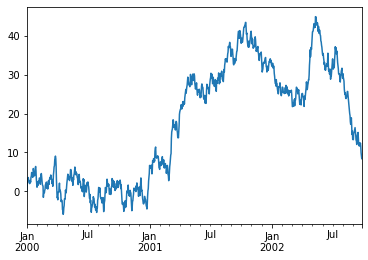

In [67]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

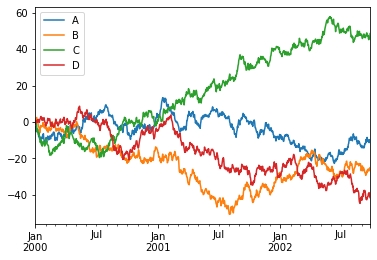

In [71]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')